In [1]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Load a CSV file
def load_csv(housing_prices):
    dataset = list()
    with open(housing_prices, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return np.array((dataset))

In [3]:
x = load_csv('housing_prices.csv') #dataset


In [4]:
x_train = x[:37]
x_train2 = []
for i in range(len(x_train)):
    t = list(map(int,x_train[i]))
    x_train2.append(t)
#print(x_train2)
    
x_test = x[-10:]
x_test2 = []
for i in range(len(x_test)):
    t = list(map(int,x_test[i]))
    x_test2.append(t)
#print(x_test2)
#x_train = list(map(int,x_train))
#x_test = list(map(int,x_test))






dataset [[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]
 [  1985      4 299900]
 [  1534      3 314900]
 [  1427      3 198999]
 [  1380      3 212000]
 [  1494      3 242500]
 [  1940      4 239999]
 [  2000      3 347000]
 [  1890      3 329999]
 [  4478      5 699900]
 [  1268      3 259900]
 [  2300      4 449900]
 [  1320      2 299900]
 [  1236      3 199900]
 [  2609      4 499998]
 [  3031      4 599000]
 [  1767      3 252900]
 [  1888      2 255000]
 [  1604      3 242900]
 [  1962      4 259900]
 [  3890      3 573900]
 [  1100      3 249900]
 [  1458      3 464500]
 [  2526      3 469000]
 [  2200      3 475000]
 [  2637      3 299900]
 [  1839      2 349900]
 [  1000      1 169900]
 [  2040      4 314900]
 [  3137      3 579900]
 [  1811      4 285900]
 [  1437      3 249900]
 [  1239      3 229900]
 [  2132      4 345000]
 [  4215      4 549000]
 [  2162      4 287000]
 [  1664      2 368500]
 [  2238

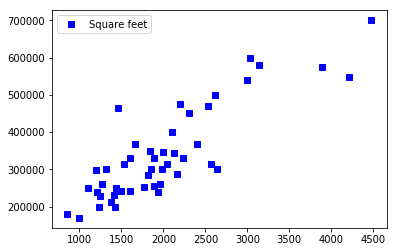

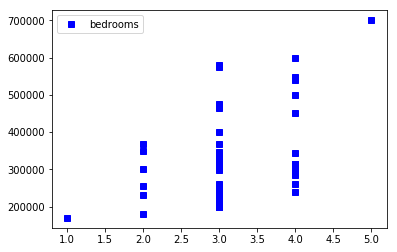

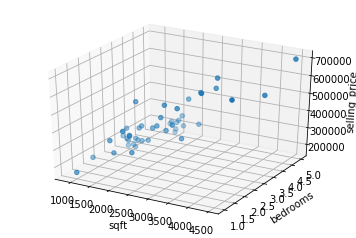

In [5]:
# Visualizing the data

#Generate the values
sqft = list(map(int,x[:,0].tolist()))
bedrooms = list(map(int,x[:,1].tolist())) 
selling_price = list(map(int,x[:,2].tolist()))
# print('sqft',sqft)
dataset = np.column_stack((sqft,bedrooms,selling_price))
print('dataset',dataset)


plt.plot(sqft,selling_price,'bs',label = 'Square feet')
plt.legend()
plt.show()


plt.plot(bedrooms,selling_price,'bs',label = 'bedrooms')
plt.legend()
plt.show()

#Create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')

#Plot the values
#color = ['red' if x in x_train else 'green']
ax.scatter3D(sqft, bedrooms, selling_price)
ax.set_xlabel('sqft')
ax.set_ylabel('bedrooms')
ax.set_zlabel('selling_price')

plt.show()

In [6]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[-1]
    for i in range(len(row)-1):
        #print(row[i],coefficients[i])
        yhat += coefficients[i] * row[i]
    #print(yhat)
    return yhat

In [7]:
# Estimate linear regression coefficients using stochastic gradient descent and mean squared error
def coefficients_sgd(train, l_rate, n_epoch):
    #coef = [0.0 for i in range(len(train[0]))]
    #coef = np.absolute(np.random.randn(len(train[0])) * 200)
    coef = [190,200,10000]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            #sum_error += error**2
            sum_error += np.power(error,2)
            coef[-1] = coef[-1] - l_rate * error
            for i in range(len(row)-1):
                coef[i] = coef[i] - l_rate * error * row[i]
            #print(coef)
            #print(yhat,row[-1],error,coef)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

In [8]:
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        predictions.append(yhat)
    return(predictions)

In [21]:
train = x_train2
test = x_test2
l_rate = 0.0000001
n_epoch = 150
linear_regression_sgd(train, test, l_rate, n_epoch)


>epoch=0, lrate=0.000, error=205146050010.948
>epoch=1, lrate=0.000, error=203820429102.060
>epoch=2, lrate=0.000, error=203820407400.319
>epoch=3, lrate=0.000, error=203820385698.654
>epoch=4, lrate=0.000, error=203820363997.117
>epoch=5, lrate=0.000, error=203820342295.708
>epoch=6, lrate=0.000, error=203820320594.427
>epoch=7, lrate=0.000, error=203820298893.274
>epoch=8, lrate=0.000, error=203820277192.249
>epoch=9, lrate=0.000, error=203820255491.352
>epoch=10, lrate=0.000, error=203820233790.582
>epoch=11, lrate=0.000, error=203820212089.941
>epoch=12, lrate=0.000, error=203820190389.427
>epoch=13, lrate=0.000, error=203820168689.042
>epoch=14, lrate=0.000, error=203820146988.784
>epoch=15, lrate=0.000, error=203820125288.655
>epoch=16, lrate=0.000, error=203820103588.653
>epoch=17, lrate=0.000, error=203820081888.779
>epoch=18, lrate=0.000, error=203820060189.033
>epoch=19, lrate=0.000, error=203820038489.415
>epoch=20, lrate=0.000, error=203820016789.925
>epoch=21, lrate=0.000,

[376326.7732832385,
 733443.7125822976,
 381470.08013824176,
 295687.4257758308,
 394297.9105529048,
 450904.72268078564,
 216339.49336979236,
 156475.25356707614,
 328322.5759698748,
 216853.8240552927]

In [10]:
# sqft_t,bedroom_t,sp_t=x_train.T
sqft_t = list(map(int,x_train[:,0].tolist()))
bedrooms_t = list(map(int,x_train[:,1].tolist()))
selling_price_t = list(map(int,x_train[:,2].tolist()))

def normalize_function(array):
    mean = np.mean(array)
    std = np.std(array)
    return (array - mean)/std

# Obtaining the normalized values
sqft_normalize_data = normalize_function(sqft_t)
bedrooms_normalize_data = normalize_function(bedrooms_t)
selling_price_normalize_data = normalize_function(selling_price_t)
normalized_dataset = normalize_function(dataset[:37])

# #printing the normalized values
print("Normalized sqft data" , sqft_normalize_data)
print("Normalized bedrooms data" , bedrooms_normalize_data)
print("Normalized selling_price data" , selling_price_normalize_data)
print("Normalized dataset" , normalized_dataset)

Normalized sqft data [ 1.39962955e-01 -5.29103743e-01  5.32906889e-01 -7.73366188e-01
  1.32941486e+00 -1.80111263e-02 -6.16719620e-01 -7.58763542e-01
 -8.21156667e-01 -6.69820152e-01 -7.77492243e-02  1.90157309e-03
 -1.44124889e-01  3.29147951e+00 -9.69838155e-01  4.00155560e-01
 -9.00807464e-01 -1.01231858e+00  8.10357167e-01  1.37056778e+00
 -3.07409024e-01 -1.46779915e-01 -5.23793690e-01 -4.85439319e-02
  2.51090169e+00 -1.19286039e+00 -7.17610630e-01  7.00173564e-01
  2.67404231e-01  8.47527539e-01 -2.11828067e-01 -1.32561172e+00
  5.50021047e-02  1.51128418e+00 -2.48998439e-01 -7.45488409e-01
 -1.00833604e+00]
Normalized bedrooms data [-0.18233124 -0.18233124 -0.18233124 -1.53158241  1.16691993  1.16691993
 -0.18233124 -0.18233124 -0.18233124 -0.18233124  1.16691993 -0.18233124
 -0.18233124  2.5161711  -0.18233124  1.16691993 -1.53158241 -0.18233124
  1.16691993  1.16691993 -0.18233124 -1.53158241 -0.18233124  1.16691993
 -0.18233124 -0.18233124 -0.18233124 -0.18233124 -0.1823312

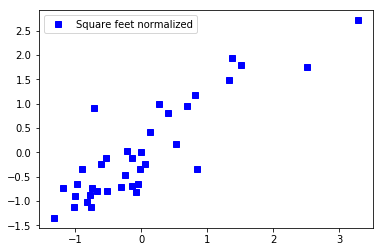

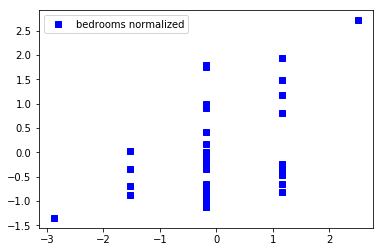

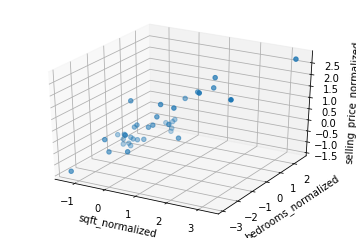

In [11]:
# Plotting normalized data

plt.plot(sqft_normalize_data,selling_price_normalize_data,'bs',label = 'Square feet normalized')
plt.legend()
plt.show()


plt.plot(bedrooms_normalize_data,selling_price_normalize_data,'bs',label = 'bedrooms normalized')
plt.legend()
plt.show()

#Create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')

#Plot the values
#color = ['red' if x in x_train else 'green']
ax.scatter3D(sqft_normalize_data, bedrooms_normalize_data, selling_price_normalize_data)
ax.set_xlabel('sqft_normalized')
ax.set_ylabel('bedrooms_normalized')
ax.set_zlabel('selling_price_normalized')

plt.show()

In [12]:
# #Training on normalized data
# X1 = np.column_stack((sqft_normalize_data,bedrooms_normalize_data,selling_price_normalize_data))
# ones = np.ones([X1.shape[0],1])
# X1 = np.concatenate((ones,X1),axis = 1)
# #print("Normalized dataset is",X1)

X1 = normalized_dataset

x_train_normalized = X1
x_train2_normalized = []
for i in range(len(x_train_normalized)):
    t = list(map(int,x_train_normalized[i]))
    x_train2_normalized.append(t)
# print(x_train2_normalized)
    
x_test_normalized = x[-10:]
x_test2_normalized = []
for i in range(len(x_test_normalized)):
    t = list(map(int,x_test_normalized[i]))
    x_test2_normalized.append(t)
    
train = x_train2_normalized
test = x_test2_normalized
l_rate = 0.0000001
n_epoch = 150
linear_regression_sgd(train, test, l_rate, n_epoch)

>epoch=0, lrate=0.000, error=3699406729.120
>epoch=1, lrate=0.000, error=3699379353.610
>epoch=2, lrate=0.000, error=3699351978.303
>epoch=3, lrate=0.000, error=3699324603.198
>epoch=4, lrate=0.000, error=3699297228.296
>epoch=5, lrate=0.000, error=3699269853.597
>epoch=6, lrate=0.000, error=3699242479.100
>epoch=7, lrate=0.000, error=3699215104.806
>epoch=8, lrate=0.000, error=3699187730.714
>epoch=9, lrate=0.000, error=3699160356.825
>epoch=10, lrate=0.000, error=3699132983.139
>epoch=11, lrate=0.000, error=3699105609.655
>epoch=12, lrate=0.000, error=3699078236.373
>epoch=13, lrate=0.000, error=3699050863.294
>epoch=14, lrate=0.000, error=3699023490.418
>epoch=15, lrate=0.000, error=3698996117.744
>epoch=16, lrate=0.000, error=3698968745.273
>epoch=17, lrate=0.000, error=3698941373.004
>epoch=18, lrate=0.000, error=3698914000.938
>epoch=19, lrate=0.000, error=3698886629.075
>epoch=20, lrate=0.000, error=3698859257.414
>epoch=21, lrate=0.000, error=3698831885.955
>epoch=22, lrate=0.0

[415874.45197444205,
 811644.451974442,
 421574.45197444205,
 326554.45197444205,
 435814.45197444205,
 498524.45197444205,
 238594.45197444205,
 172274.45197444205,
 362674.45197444205,
 239164.45197444205]